<a href="https://colab.research.google.com/github/pjmartel/jupyter-notebooks/blob/master/Enzymolgy_qgrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import numpy.random as rnd
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib import style,rcParams
from seaborn import regplot
from scipy.stats import linregress
style.use('default')
rcParams.update({'axes.grid': True})
rcParams.update({'errorbar.capsize': 2})
pd.options.display.float_format = '{:,.3f}'.format
#style.use('dark_background')
#style.use('default')
import qgrid

In [0]:
#variables
#Km = 12.3
#Vmax = 86.1
Km = 1
Vmax = 2
smin = 1
smax = 60
step = 5
repl = 3
npoints = 10
std_dev = 0.1
err_type = "absolut"
outl_prob = 0.0



In [0]:
# Michaelis-Menten equation
def MM(K,V,s):
  return V*s/(K+s)

In [0]:
# #generate the data
# s = np.linspace(0.2*Km,3.0*Km,npoints)
# v = np.zeros((len(s),repl))
# for i in range(repl):
#   v[:,i] = MM(Km,Vmax,s)
# err = rnd.normal(0,std_dev,v.shape)
# if err_type == "absolut":
#   v = v + err
# else:
#   v = v * err
# from sys import stdout
# #np.savetxt(stdout, np.hstack([s.reshape(-1,1),v]),fmt=" %5.2f ")

In [0]:
# Michaelis-Menten equation
def MM(K,V,s):
  return V*s/(K+s)

# Function to validate input by data type
def check_input(f_type,message):
    """
Wrapper around the input function, reads input
until it matches the required data type. 
    """
    flag = True
    while flag:
        value = input(message)
        try:
            value = f_type(value)
            flag = False
        except ValueError:
            pass
    return value

# Read the number of points and replicates
npoints = check_input(int,"Number of points? ")
nrepl = check_input(int,"Number of replicates? ")
  

In [0]:
# create an empy pandas data frame with the
# npoint lines and nrepl+1 columns
# enz_data.iloc[:,1:4].mean(axis=1)
# enz_data.iloc[:,1:4].std(axis=1)
#
columns = ['[A]']
columns = columns + ['v'+str(i+1) for i in range(nrepl)]
enz_data = pd.DataFrame(np.zeros((npoints, nrepl+1)),columns=columns)
#enz_data = pd.DataFrame(np.hstack([s.reshape(-1,1),v]),columns=columns)
# Create a qgrid table to input the data
qgrid_widget = qgrid.show_grid(enz_data, show_toolbar=False)
qgrid_widget.layout = ipyw.Layout(width='50%')
qgrid_widget

In [0]:
enz_data = qgrid_widget.get_changed_df()
enz_data['Mean v']=enz_data.iloc[:,1:].mean(axis=1)
enz_data['Std v']=enz_data.iloc[:,1:-1].std(axis=1)
#enz_data['fit_error']=enz_data['Mean v']-MM(Km,Vmax,enz_data['[A]'])
enz_data

In [0]:
v = np.array(enz_data.iloc[:,1:-2])
s = np.array(enz_data['[A]'])

In [0]:
# # create a pandas data frame with the data
# # also works:
# # enz_data.iloc[:,1:4].mean(axis=1)
# # enz_data.iloc[:,1:4].std(axis=1)
# #
# columns = ['[A]']
# columns = columns + ['v'+str(i+1) for i in range(repl)]
# enz_data = pd.DataFrame(np.hstack([s.reshape(-1,1),v]),columns=columns)
# enz_data['Mean v']=enz_data[columns[1:]].mean(axis=1)
# enz_data['Std v']=enz_data[columns[1:]].std(axis=1)
# enz_data['fit_error']=enz_data['Mean v']-MM(Km,Vmax,enz_data['[A]'])
# enz_data

,[A],v1,v2,v3,Mean v,Std v,fit_error
0,0.200,0.321,0.238,0.349,0.302,0.058,-0.031
1,0.511,0.613,0.636,0.603,0.617,0.017,-0.059
2,0.822,0.934,0.931,0.807,0.891,0.073,-0.012
3,1.133,0.965,1.156,1.035,1.052,0.097,-0.010
4,1.444,1.122,1.251,1.264,1.212,0.079,0.031
5,1.756,1.302,1.080,1.360,1.247,0.148,-0.027
6,2.067,1.153,1.141,1.270,1.188,0.072,-0.160
7,2.378,1.409,1.416,1.235,1.354,0.102,-0.054
8,2.689,1.483,1.275,1.440,1.399,0.110,-0.058
9,3.000,1.701,1.348,1.419,1.489,0.186,-0.011


In [0]:
# Create a pandas dataframa for storing the various estimates
df_estimates = pd.DataFrame(np.zeros((2,4)),index = ['Km','Vmax'],columns=['True','L-B','H-W','E-CB'])
#df_estimates['True'] = Km,Vmax
df_estimates

,True,L-B,H-W,E-CB
Km,1,0.000,0.000,0.000
Vmax,2,0.000,0.000,0.000


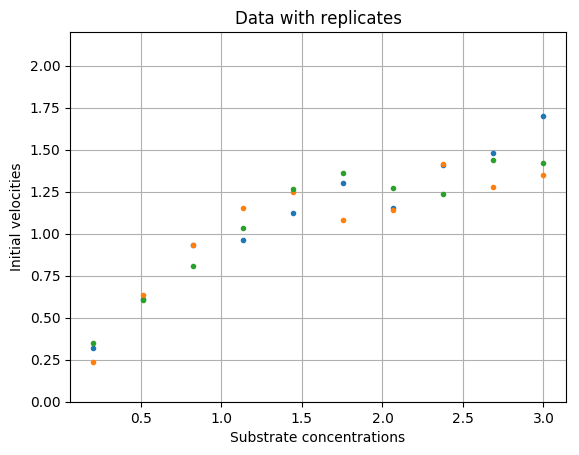

In [0]:


plt.title("Data with replicates")
plt.xlabel("Substrate concentrations")
plt.ylabel("Initial velocities")
#plt.ylim(0,1.1*Vmax)
plt.plot(s,v,'.');

In [0]:
# plt.plot('[A]','Mean v','r.',data=enz_data,label="data")
# sz = np.arange(0,s.max(),0.01)
# plt.plot(sz,MM(Km,Vmax,sz),'k--',label="True (Km={},Vmax={})".format(Km,Vmax))
# plt.title("Mean of generated data $\mathit{versus}$ true values")
# plt.xlabel("Substrate concentration")
# plt.ylim(0,1.1*Vmax)
# plt.ylabel("Initial velocity")
# plt.legend()
# #plt.plot(s,v,'k.')

Text(0.5, 1.0, 'Michaelis-Menten Plot with error bars ($\\sigma$=0.10)')

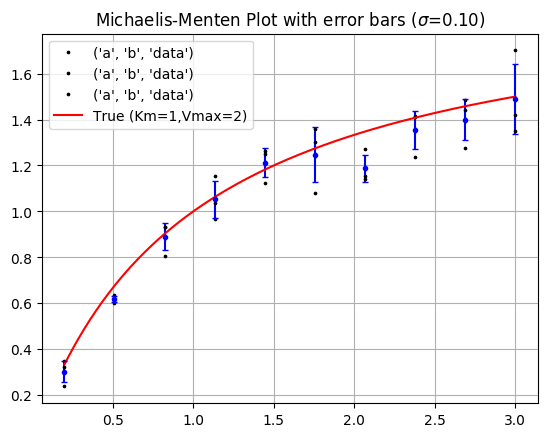

In [0]:
# 
plt.plot(s,v,'k.',ms=3.3)
plt.errorbar(s,v.mean(axis=1),fmt='b.',xerr=0.0,yerr=v.std(axis=1),capsize=2)
plt.title("Michaelis-Menten Plot with error bars")

In [0]:
from seaborn import regplot

Km = 1.154, Vmax= 2.049, R = 0.9987


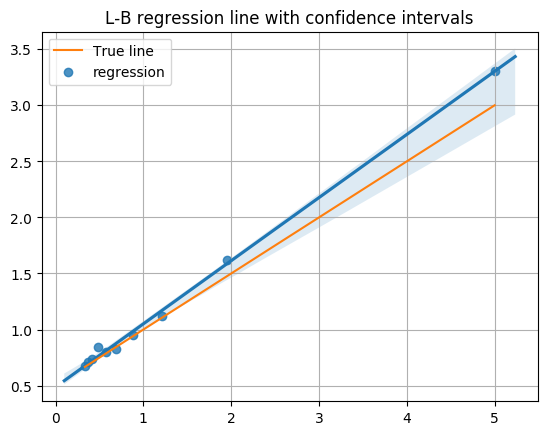

In [0]:
vlb = v[:,0]
vlb = v.mean(axis=1)
regplot(1/s,1/vlb,label="regression")
m, b,r,_,_ = linregress(1/s,1/vlb)
_ = plt.title("L-B regression line with confidence intervals")
plt.legend()
#print(m,b,r)
print("Km = {:5.3f}, Vmax= {:5.3f}, R2 = {:.4f}".format(m/b,1/b,r*r))
df_estimates['L-B'] = m/b,1/b

In [0]:
# Hanes-Woolfe mean of replicates with linear regression
#shw = np.repeat(s.reshape(-1,1),v.shape[1],axis=1)
shw = s
vhw = v.mean(axis=1)
#vhw = v[:,0]
vhw = s / vhw
#plt.errorbar(s,Km/Vmax+s/Vmax,fmt="k-",ecolor='r',xerr=0,
#             yerr=vhw.std(axis=1),capsize=2)
plt.plot(s,vhw,"g.",ms=5,label="data")
#plt.hlines(0.5,0,0.5,linestyle="dashed")
#plt.vlines(0.5,0,0.5,linestyle="dashed")
plt.legend()
plt.ylabel("$[S]_i/v_i$")
plt.xlabel("$[S]_i$")
plt.title("Linearização de Hanes-Woolfe")
plt.show()

Km = 1.049, Vmax= 1.959, R = 0.9913


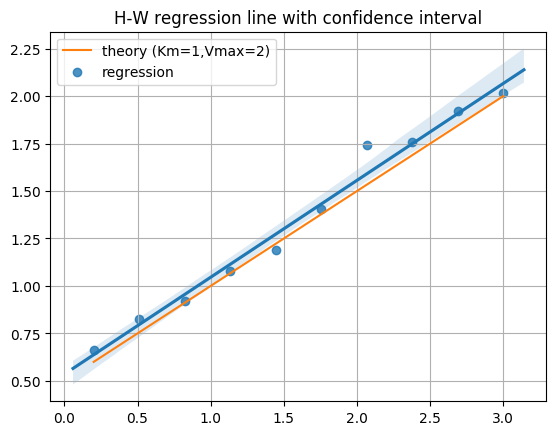

In [0]:
regplot(s,vhw,label="regression")
m, b,r,_,_ = linregress(s,vhw)
_ = plt.title("H-W regression line with confidence interval")
plt.legend()
#print(m,b,r)
#print(1/m,b/m)
print("Km = {:5.3f}, Vmax= {:5.3f}, R = {:.4f}".format(b/m,1/m,r))
df_estimates['H-W'] = b/m, 1/m

In [0]:
# Computation of simple linear regression
mm = np.cov(s,vhw,ddof=0)[1,0]/s.var(ddof=0)
bb = vhw.mean()-s.mean()*mm
mm,m,bb,b

(0.510447209653114, 0.5104472096531137, 0.5353709422828796, 0.5353709422828801)

In [0]:
((s*vhw).sum() - s.sum()*vhw.sum())/10, np.cov(s,vhw,ddof=0)[1,0]
vhw

array([0.66133381, 0.82807331, 0.9231715 , 1.07716607, 1.19129511,
       1.40738772, 1.73988327, 1.75673923, 1.92147072, 2.01434403])

In [0]:
(s*vhw).mean()-s.mean()*vhw.mean(),np.cov(s,vhw,ddof=0)[1,0]

(0.4076015496341161, 0.4076015496341162)

In [0]:
(s*vhw).sum() - s.sum()*vhw.sum()

-190.624437296471

In [0]:
(s*vhw).sum() /10 - (s.sum()*vhw.sum())/10 /10

0.4076015496341161

Computing 45 intersections
Km = 1.043, Vmax= 1.992


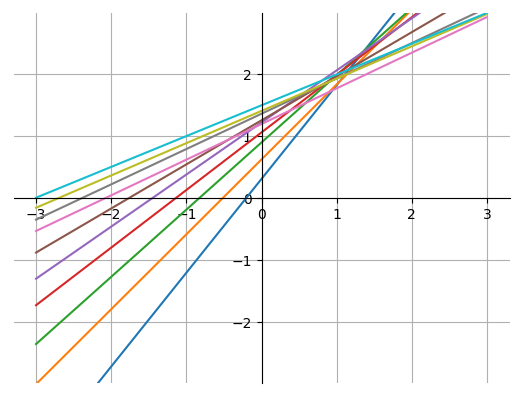

In [0]:
import matplotlib.pyplot as plt
vm = v.mean(axis=1)
x = np.arange(-s.max(),s.max(),0.01)
median_Vmax = []
median_Km = []
mmlines = np.vstack((vm/s,vm)).T
n_int = len(s)*(len(s)-1)//2
Km_int = np.zeros(n_int)
Vmax_int = np.zeros(n_int)

for m, b in mmlines:
  plt.plot(x,m*x+b)

print("Computing {:d} intersections".format(n_int))
for i in range(mmlines.shape[0]):
  for j in range(i):
    m1, b1 = mmlines[i]
    m2, b2 = mmlines[j]
    x = (b2-b1)/(m1-m2)
    y = (b2*m1-b1*m2)/(m1-m2)
    median_Km.append(x)
    median_Vmax.append(y)
    #print(x,y)
    #pass
    #print(i,j,mmlines[i],mmlines[j])rray python

ax = plt.gca()
ax.axis([-1.1*s.max(),1.1*s.max(),-2*vm.max(),2*vm.max()])
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#ax.set_xlabel("Km")
#ax.set_ylabel("Vmax")

#ax.set_ylabel?
  
print("Km = {:5.3f}, Vmax= {:5.3f}".format(np.median(median_Km), np.median(median_Vmax)))
df_estimates['E-CB'] = np.median(median_Km), np.median(median_Vmax)

In [0]:
df_estimates

,True,L-B,H-W,E-CB
Km,1,1.154,1.049,1.043
Vmax,2,2.049,1.959,1.992


In [0]:
vm

In [0]:
s

Km = 1.100, Vmax= 2.007


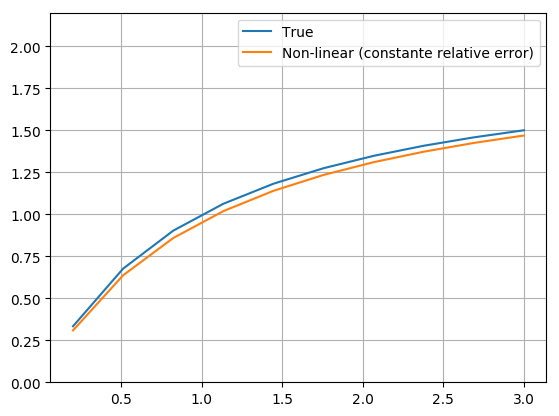

In [0]:
# Non-linear least square fitting (constant relative error)
# Johansen and Lumry
D = (vm*vm / s / s).sum()*vm.sum()-(vm*vm/s).sum()*(vm/s).sum()
NL_Vmax = ((vm*vm / s / s).sum()*(vm*vm).sum()-((vm*vm/s).sum())**2) / D
NL_Km = ((vm*vm).sum()*(vm/s).sum()-(vm*vm/s).sum()*vm.sum()) / D
plt.plot(s,MM(Km,Vmax,s),label="True")
plt.plot(s,MM(NL_Km,NL_Vmax,s),label = "Non-linear (constante relative error)")
plt.legend()
plt.ylim(0,1.1*Vmax)
print("Km = {:5.3f}, Vmax= {:5.3f}".format(NL_Km, NL_Vmax))

The error in the estimates is computed using the experimental variance:

$$ \sigma_{exp}^2 = \frac{\widehat{SS}}{(n-2)}$$

where $\widehat{SS}$ is the weighted sum of squares:

$$ \widehat{SS} = \sum w (1/v-1/\hat v)^2  $$

for constant relative error the weights are $w_i = v_i^2$, and for constant error they are $ w_i = \hat v^3v$ .

In [0]:
# Compute the experimental variance
v_hat = MM(NL_Km, NL_Vmax,s)
exp_var = (vm*vm*(1/vm - 1/v_hat)**2).sum() / (npoints-2) 
Vmax_var = (NL_Vmax)**4 * exp_var**2 * (vm*vm / s / s).sum() 
Vmax_var = Vmax_var / ((vm*vm / s / s).sum() * (vm*vm).sum() - ((vm*vm/s).sum())**2)           
Vmax_var

1.536950806839028e-05

In [0]:
(((1/vm - 1/v_hat)**2)*vm*vm).sum() / 8

0.058197325002079026

In [0]:
 D = (vm*vm / s / s).sum()*vm.sum()-(vm*vm/s).sum()*(vm/s).sum()

In [0]:
B = (vm*vm).sum()*(vm/s).sum()-(vm*vm/s).sum()*vm.sum()

In [0]:
A/D,B/D